# Aggregating columns together based on subcategory

### Pre-process data

#### Note: Importance values are from other notebooks

In [68]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [69]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error
from math import sqrt

In [70]:
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [71]:
df = pd.read_csv(data)

In [72]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Subcategory 1: Main Factors

In [73]:
new_main_df = df[['Id', "SalePrice", "OverallQual", "OverallCond", "LotArea", "YearBuilt", "Street", "LotShape"]]

In [74]:
new_main_df.head()

,Id,SalePrice,OverallQual,OverallCond,LotArea,YearBuilt,Street,LotShape
0,1,208500,7,5,8450,2003,Pave,Reg
1,2,181500,6,8,9600,1976,Pave,Reg
2,3,223500,7,5,11250,2001,Pave,IR1
3,4,140000,7,5,9550,1915,Pave,IR1
4,5,250000,8,5,14260,2000,Pave,IR1


In [75]:
#Feature importance from main_analysis_df
main_importance = pd.DataFrame()
main_importance["variable"] = ['OverallQual', 'LotArea', 'YearBuilt', 'LotShape']
main_importance["importance"] = [76.95991136103147, 18.75558088809967, 3.0246606935231912, 1.2598470573456726]
main_importance

,variable,importance
0,OverallQual,76.959911
1,LotArea,18.755581
2,YearBuilt,3.024661
3,LotShape,1.259847


##### Catboost Normalised RMSE: 0.06657866598719948

### Subcategory 2: Garage Details

In [76]:
garage_df = df[["Id", "SalePrice", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]

In [77]:
garage_df.head()

,Id,SalePrice,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,1,208500,Attchd,2003.0,RFn,2,548,TA,TA
1,2,181500,Attchd,1976.0,RFn,2,460,TA,TA
2,3,223500,Attchd,2001.0,RFn,2,608,TA,TA
3,4,140000,Detchd,1998.0,Unf,3,642,TA,TA
4,5,250000,Attchd,2000.0,RFn,3,836,TA,TA


In [78]:
garage_importance = pd.DataFrame()
garage_importance["variable"] = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
garage_importance["importance"] = [7.0372203818727534, 15.101076654321679, 16.594485367397123, 26.732025422742815, 33.54529737715993, 0.3450221588943238, 0.6448726376113748]
garage_importance

,variable,importance
0,GarageType,7.037220
1,GarageYrBlt,15.101077
2,GarageFinish,16.594485
3,GarageCars,26.732025
4,GarageArea,33.545297
5,GarageQual,0.345022
6,GarageCond,0.644873


##### Catboost Normalised RMSE: 0.09055755195766964

### Subcategory 3: Basement Details

In [79]:
basement_df = df[['Id', "SalePrice", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]

In [80]:
basement_df.head()

,Id,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,1,208500,Gd,TA,No,GLQ,706,Unf,0,150,856
1,2,181500,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
2,3,223500,Gd,TA,Mn,GLQ,486,Unf,0,434,920
3,4,140000,TA,Gd,No,ALQ,216,Unf,0,540,756
4,5,250000,Gd,TA,Av,GLQ,655,Unf,0,490,1145


In [81]:
basement_importance = pd.DataFrame()
basement_importance["variable"] = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','TotalBsmtSF']
basement_importance["importance"] = [38.90071168327252, 1.5007923822496567, 8.373343396151819, 7.687886066966812, 43.537266471359175]
basement_importance

,variable,importance
0,BsmtQual,38.900712
1,BsmtCond,1.500792
2,BsmtExposure,8.373343
3,BsmtFinType1,7.687886
4,TotalBsmtSF,43.537266


##### Catboost Normalised RMSE: 0.07761983722416106

### Subcategory 4: Utilities

In [82]:
utilities_df = df[["SalePrice", "Utilities", "Heating", "HeatingQC", "CentralAir", "Electrical", "Fireplaces", "FireplaceQu"]]

In [83]:
utilities_df.head()

,SalePrice,Utilities,Heating,HeatingQC,CentralAir,Electrical,Fireplaces,FireplaceQu
0,208500,AllPub,GasA,Ex,Y,SBrkr,0,NaN
1,181500,AllPub,GasA,Ex,Y,SBrkr,1,TA
2,223500,AllPub,GasA,Ex,Y,SBrkr,1,TA
3,140000,AllPub,GasA,Gd,Y,SBrkr,1,Gd
4,250000,AllPub,GasA,Ex,Y,SBrkr,1,TA


In [84]:
utilities_importance = pd.DataFrame()
utilities_importance["variable"] = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Fireplaces', 'FireplaceQu']
utilities_importance["importance"] = [1.4827008116357552, 39.684940887098975, 2.595176412575824, 5.262203287408806, 11.978141353196063, 38.99683724808456]
utilities_importance

,variable,importance
0,Heating,1.482701
1,HeatingQC,39.684941
2,CentralAir,2.595176
3,Electrical,5.262203
4,Fireplaces,11.978141
5,FireplaceQu,38.996837


##### Catboost Normalised RMSE: 0.09698163274687885

### Subcategory 5: Miscellaneous

In [85]:
misc_df = df[["SalePrice", "MoSold", "YrSold", "SaleType", "SaleCondition", "Condition1", "Condition2"]]

In [86]:
misc_df.head()

,SalePrice,MoSold,YrSold,SaleType,SaleCondition,Condition1,Condition2
0,208500,2,2008,WD,Normal,Norm,Norm
1,181500,5,2007,WD,Normal,Feedr,Norm
2,223500,9,2008,WD,Normal,Norm,Norm
3,140000,2,2006,WD,Abnorml,Norm,Norm
4,250000,12,2008,WD,Normal,Norm,Norm


In [87]:
misc_importance = pd.DataFrame()
misc_importance["variable"] = ["MoSold", "YrSold", "SaleType", "SaleCondition", "Condition1", "Condition2"]
misc_importance["importance"] = [0.673250258242363, 1.163618892900523, 10.767204900486272, 73.54024102192115, 13.85568492644969, 0.0]
misc_importance

,variable,importance
0,MoSold,0.673250
1,YrSold,1.163619
2,SaleType,10.767205
3,SaleCondition,73.540241
4,Condition1,13.855685
5,Condition2,0.000000


##### Catboost Normalised RMSE: 0.1162533727829413

In [88]:
### Subcategory 6: External Features

In [89]:
exterior_df = df[['SalePrice', 'LandContour', 'LandSlope', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']]

In [90]:
exterior_df.head()

,SalePrice,LandContour,LandSlope,Neighborhood,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond
0,208500,Lvl,Gtl,CollgCr,Gable,CompShg,VinylSd,VinylSd,Gd,TA
1,181500,Lvl,Gtl,Veenker,Gable,CompShg,MetalSd,MetalSd,TA,TA
2,223500,Lvl,Gtl,CollgCr,Gable,CompShg,VinylSd,VinylSd,Gd,TA
3,140000,Lvl,Gtl,Crawfor,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA
4,250000,Lvl,Gtl,NoRidge,Gable,CompShg,VinylSd,VinylSd,Gd,TA


In [91]:
exterior_importance = pd.DataFrame()
exterior_importance["variable"] = ['LandContour', 'LandSlope', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']
exterior_importance["importance"] = [1.2835122533473295, 3.1009698819408307, 32.62214937360188, 6.673037642907108, 2.822641228551309, 4.494415714904176, 4.346209810404765, 42.543348483762145, 2.1137156105804675]
exterior_importance

,variable,importance
0,LandContour,1.283512
1,LandSlope,3.100970
2,Neighborhood,32.622149
3,RoofStyle,6.673038
4,RoofMatl,2.822641
5,Exterior1st,4.494416
6,Exterior2nd,4.346210
7,ExterQual,42.543348
8,ExterCond,2.113716


### Aggregate columns with higher feature importance

In [92]:
model_df = df[['SalePrice', 'OverallQual', 'LotArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'FireplaceQu', 'SaleCondition', 'Neighborhood', 'ExterQual']]

In [93]:
model_df.head()

,SalePrice,OverallQual,LotArea,GarageYrBlt,GarageFinish,GarageCars,GarageArea,BsmtQual,TotalBsmtSF,HeatingQC,FireplaceQu,SaleCondition,Neighborhood,ExterQual
0,208500,7,8450,2003.0,RFn,2,548,Gd,856,Ex,NaN,Normal,CollgCr,Gd
1,181500,6,9600,1976.0,RFn,2,460,Gd,1262,Ex,TA,Normal,Veenker,TA
2,223500,7,11250,2001.0,RFn,2,608,Gd,920,Ex,TA,Normal,CollgCr,Gd
3,140000,7,9550,1998.0,Unf,3,642,TA,756,Gd,Gd,Abnorml,Crawfor,TA
4,250000,8,14260,2000.0,RFn,3,836,Gd,1145,Ex,TA,Normal,NoRidge,Gd


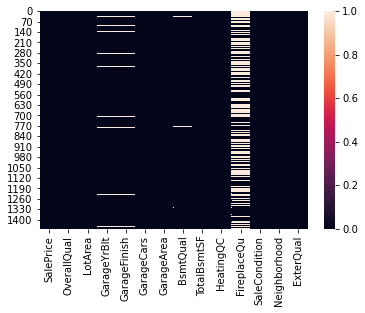

In [94]:
sns.heatmap(model_df.isnull())

In [95]:
#Converting to numerical values
model_df["GarageFinish"] = model_df["GarageFinish"].astype('category').cat.codes
model_df["BsmtQual"] = model_df["BsmtQual"].astype('category').cat.codes
model_df["HeatingQC"] = model_df["HeatingQC"].astype('category').cat.codes
model_df["FireplaceQu"] = model_df["FireplaceQu"].astype('category').cat.codes
model_df["SaleCondition"] = model_df["SaleCondition"].astype('category').cat.codes
model_df["ExterQual"] = model_df["ExterQual"].astype('category').cat.codes
model_df["Neighborhood"] = model_df["Neighborhood"].astype('category').cat.codes

model_df = model_df.fillna(0)
model_df["GarageYrBlt"] = model_df["GarageYrBlt"].astype(int)

<ipython-input-95-6d166395fef2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GarageFinish"] = model_df["GarageFinish"].astype('category').cat.codes
<ipython-input-95-6d166395fef2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["BsmtQual"] = model_df["BsmtQual"].astype('category').cat.codes
<ipython-input-95-6d166395fef2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [96]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SalePrice      1460 non-null   int64
 1   OverallQual    1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   GarageYrBlt    1460 non-null   int64
 4   GarageFinish   1460 non-null   int8 
 5   GarageCars     1460 non-null   int64
 6   GarageArea     1460 non-null   int64
 7   BsmtQual       1460 non-null   int8 
 8   TotalBsmtSF    1460 non-null   int64
 9   HeatingQC      1460 non-null   int8 
 10  FireplaceQu    1460 non-null   int8 
 11  SaleCondition  1460 non-null   int8 
 12  Neighborhood   1460 non-null   int8 
 13  ExterQual      1460 non-null   int8 
dtypes: int64(7), int8(7)
memory usage: 89.9 KB


### CatBoost

In [97]:
X = model_df.drop(["SalePrice"], axis = 1)
y = model_df[["SalePrice"]]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 529 to 61
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OverallQual    292 non-null    int64
 1   LotArea        292 non-null    int64
 2   GarageYrBlt    292 non-null    int64
 3   GarageFinish   292 non-null    int8 
 4   GarageCars     292 non-null    int64
 5   GarageArea     292 non-null    int64
 6   BsmtQual       292 non-null    int8 
 7   TotalBsmtSF    292 non-null    int64
 8   HeatingQC      292 non-null    int8 
 9   FireplaceQu    292 non-null    int8 
 10  SaleCondition  292 non-null    int8 
 11  Neighborhood   292 non-null    int8 
 12  ExterQual      292 non-null    int8 
dtypes: int64(6), int8(7)
memory usage: 18.0 KB


In [100]:
category = ["OverallQual", "GarageYrBlt", "GarageFinish", "GarageCars", "BsmtQual", "HeatingQC", "FireplaceQu", "SaleCondition", "Neighborhood", "ExterQual"]

In [101]:
cat_boost = CatBoostRegressor(depth=3, learning_rate=0.1, loss_function='RMSE')
cat_boost.fit(X_train, y_train, cat_features=category)

0:	learn: 73903.3613083	total: 54.1ms	remaining: 54s
1:	learn: 70036.9891368	total: 58.3ms	remaining: 29.1s
2:	learn: 66615.3653712	total: 62ms	remaining: 20.6s
3:	learn: 63527.4863011	total: 65.7ms	remaining: 16.4s
4:	learn: 60623.2174795	total: 70.6ms	remaining: 14s
5:	learn: 57882.4710982	total: 73.8ms	remaining: 12.2s
6:	learn: 55667.4895028	total: 79.6ms	remaining: 11.3s
7:	learn: 53713.1997102	total: 82.4ms	remaining: 10.2s
8:	learn: 51773.9293909	total: 85.5ms	remaining: 9.41s
9:	learn: 50096.5767722	total: 87.7ms	remaining: 8.68s
10:	learn: 48562.3561380	total: 90.9ms	remaining: 8.18s
11:	learn: 47339.7824547	total: 93.8ms	remaining: 7.72s
12:	learn: 45829.2610853	total: 97.2ms	remaining: 7.38s
13:	learn: 44828.5642752	total: 101ms	remaining: 7.12s
14:	learn: 43725.8937131	total: 104ms	remaining: 6.84s
15:	learn: 42469.0745514	total: 108ms	remaining: 6.67s
16:	learn: 41378.3353978	total: 111ms	remaining: 6.44s
17:	learn: 40443.7968730	total: 114ms	remaining: 6.2s
18:	learn: 396

154:	learn: 27129.4963042	total: 429ms	remaining: 2.34s
155:	learn: 27122.4275359	total: 431ms	remaining: 2.33s
156:	learn: 27099.2606456	total: 433ms	remaining: 2.33s
157:	learn: 27078.1269726	total: 436ms	remaining: 2.32s
158:	learn: 27071.6870152	total: 439ms	remaining: 2.32s
159:	learn: 27067.6143755	total: 441ms	remaining: 2.32s
160:	learn: 27024.4466005	total: 444ms	remaining: 2.31s
161:	learn: 27005.0575560	total: 446ms	remaining: 2.31s
162:	learn: 26958.7185253	total: 449ms	remaining: 2.31s
163:	learn: 26948.2933815	total: 452ms	remaining: 2.31s
164:	learn: 26876.1096693	total: 455ms	remaining: 2.3s
165:	learn: 26864.3393961	total: 457ms	remaining: 2.29s
166:	learn: 26855.9599557	total: 460ms	remaining: 2.29s
167:	learn: 26834.5620184	total: 463ms	remaining: 2.29s
168:	learn: 26808.1047282	total: 465ms	remaining: 2.29s
169:	learn: 26802.5662549	total: 468ms	remaining: 2.28s
170:	learn: 26781.3513051	total: 476ms	remaining: 2.31s
171:	learn: 26770.0698545	total: 480ms	remaining:

303:	learn: 24567.4615601	total: 805ms	remaining: 1.84s
304:	learn: 24547.7489662	total: 808ms	remaining: 1.84s
305:	learn: 24542.4629692	total: 811ms	remaining: 1.84s
306:	learn: 24538.7303678	total: 814ms	remaining: 1.84s
307:	learn: 24532.2397607	total: 816ms	remaining: 1.83s
308:	learn: 24521.7636222	total: 819ms	remaining: 1.83s
309:	learn: 24518.6138987	total: 822ms	remaining: 1.83s
310:	learn: 24491.2188764	total: 824ms	remaining: 1.83s
311:	learn: 24488.1637928	total: 827ms	remaining: 1.82s
312:	learn: 24475.3907625	total: 829ms	remaining: 1.82s
313:	learn: 24460.7021573	total: 831ms	remaining: 1.81s
314:	learn: 24458.2277887	total: 834ms	remaining: 1.81s
315:	learn: 24447.4879043	total: 836ms	remaining: 1.81s
316:	learn: 24445.8163418	total: 839ms	remaining: 1.81s
317:	learn: 24434.6962479	total: 841ms	remaining: 1.8s
318:	learn: 24432.9794182	total: 843ms	remaining: 1.8s
319:	learn: 24432.2320255	total: 845ms	remaining: 1.8s
320:	learn: 24419.4113050	total: 848ms	remaining: 1

455:	learn: 22782.2914731	total: 1.18s	remaining: 1.41s
456:	learn: 22781.7861175	total: 1.19s	remaining: 1.41s
457:	learn: 22779.8710935	total: 1.19s	remaining: 1.41s
458:	learn: 22767.1264863	total: 1.19s	remaining: 1.41s
459:	learn: 22757.3008649	total: 1.19s	remaining: 1.4s
460:	learn: 22756.1143580	total: 1.2s	remaining: 1.4s
461:	learn: 22752.3999557	total: 1.2s	remaining: 1.4s
462:	learn: 22751.0387757	total: 1.2s	remaining: 1.39s
463:	learn: 22740.7864202	total: 1.2s	remaining: 1.39s
464:	learn: 22735.1619290	total: 1.21s	remaining: 1.39s
465:	learn: 22726.3673702	total: 1.21s	remaining: 1.39s
466:	learn: 22708.6867091	total: 1.21s	remaining: 1.38s
467:	learn: 22674.1109473	total: 1.21s	remaining: 1.38s
468:	learn: 22667.2184034	total: 1.22s	remaining: 1.38s
469:	learn: 22649.6008591	total: 1.22s	remaining: 1.37s
470:	learn: 22641.9735610	total: 1.22s	remaining: 1.37s
471:	learn: 22614.3726594	total: 1.22s	remaining: 1.37s
472:	learn: 22610.3617687	total: 1.23s	remaining: 1.37s

620:	learn: 21052.0144785	total: 1.56s	remaining: 952ms
621:	learn: 21051.9759263	total: 1.56s	remaining: 950ms
622:	learn: 21049.9466722	total: 1.56s	remaining: 947ms
623:	learn: 21036.2888757	total: 1.57s	remaining: 945ms
624:	learn: 21031.8279986	total: 1.57s	remaining: 942ms
625:	learn: 21024.1203540	total: 1.57s	remaining: 939ms
626:	learn: 21021.2678520	total: 1.57s	remaining: 937ms
627:	learn: 21014.8206931	total: 1.58s	remaining: 935ms
628:	learn: 21004.1310176	total: 1.58s	remaining: 932ms
629:	learn: 20995.6659394	total: 1.58s	remaining: 929ms
630:	learn: 20988.6663442	total: 1.58s	remaining: 927ms
631:	learn: 20982.4552939	total: 1.59s	remaining: 924ms
632:	learn: 20981.7872301	total: 1.59s	remaining: 921ms
633:	learn: 20966.2307645	total: 1.59s	remaining: 919ms
634:	learn: 20961.6204119	total: 1.59s	remaining: 916ms
635:	learn: 20947.0642067	total: 1.6s	remaining: 914ms
636:	learn: 20935.8599333	total: 1.6s	remaining: 911ms
637:	learn: 20928.7919195	total: 1.6s	remaining: 9

780:	learn: 19693.8813367	total: 1.94s	remaining: 543ms
781:	learn: 19683.6283473	total: 1.94s	remaining: 540ms
782:	learn: 19679.0786164	total: 1.94s	remaining: 538ms
783:	learn: 19675.7312030	total: 1.94s	remaining: 536ms
784:	learn: 19668.1555656	total: 1.95s	remaining: 533ms
785:	learn: 19667.0641064	total: 1.95s	remaining: 531ms
786:	learn: 19661.7743819	total: 1.95s	remaining: 529ms
787:	learn: 19646.1798696	total: 1.96s	remaining: 526ms
788:	learn: 19625.3443798	total: 1.96s	remaining: 524ms
789:	learn: 19622.7580477	total: 1.96s	remaining: 522ms
790:	learn: 19615.6821456	total: 1.97s	remaining: 519ms
791:	learn: 19612.8770141	total: 1.97s	remaining: 517ms
792:	learn: 19606.7573903	total: 1.97s	remaining: 515ms
793:	learn: 19596.6469229	total: 1.97s	remaining: 512ms
794:	learn: 19584.7544754	total: 1.98s	remaining: 510ms
795:	learn: 19578.1404806	total: 1.98s	remaining: 508ms
796:	learn: 19576.5402971	total: 1.98s	remaining: 505ms
797:	learn: 19568.4276125	total: 1.99s	remaining

931:	learn: 18569.1593133	total: 2.31s	remaining: 169ms
932:	learn: 18562.6385914	total: 2.32s	remaining: 166ms
933:	learn: 18551.0858286	total: 2.32s	remaining: 164ms
934:	learn: 18539.4165655	total: 2.32s	remaining: 162ms
935:	learn: 18532.9847912	total: 2.33s	remaining: 159ms
936:	learn: 18527.3251890	total: 2.33s	remaining: 157ms
937:	learn: 18525.0011823	total: 2.33s	remaining: 154ms
938:	learn: 18514.6213986	total: 2.33s	remaining: 152ms
939:	learn: 18513.2165895	total: 2.34s	remaining: 149ms
940:	learn: 18495.0815117	total: 2.34s	remaining: 147ms
941:	learn: 18493.2270581	total: 2.34s	remaining: 144ms
942:	learn: 18490.8745628	total: 2.34s	remaining: 142ms
943:	learn: 18490.4877127	total: 2.35s	remaining: 139ms
944:	learn: 18488.9285741	total: 2.35s	remaining: 137ms
945:	learn: 18476.7607493	total: 2.35s	remaining: 134ms
946:	learn: 18472.6055415	total: 2.35s	remaining: 132ms
947:	learn: 18457.7436917	total: 2.36s	remaining: 129ms
948:	learn: 18454.9246315	total: 2.36s	remaining

In [102]:
y_pred = cat_boost.predict(X_test)

In [103]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,342863.762096
1,133000,135590.122860
2,110000,126527.282382
3,192000,229340.818042
4,88000,108578.475729


In [104]:
## We should also look at RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

36369.66016046671

In [105]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.05364256660835798

In [106]:
new_main_df.drop(["SalePrice"], axis = 1).columns.values

array(['Id', 'OverallQual', 'OverallCond', 'LotArea', 'YearBuilt',
       'Street', 'LotShape'], dtype=object)

In [107]:
list(cat_boost.get_feature_importance(Pool(X_test, label = y_test, cat_features=category)))

[27.866947761394112,
 9.785447873181614,
 2.2991536057358704,
 4.89519397934519,
 11.530599643005157,
 6.0451216985195595,
 4.012259051493206,
 11.854411942275274,
 1.0480353821142068,
 5.230525415722579,
 1.6368435266977275,
 7.582832327232733,
 6.212627793282839]

#### We can see that the model is not predicting the higher Actual value houses very well. There might be additional features that we can include to help with higher valued houses

In [108]:
df[df["Actual"] > 400000]

,Actual,Predicted
8,745000,590257.471910
44,403000,330428.251066
50,412500,346745.464701
126,415298,478720.157576
253,438780,453785.853593
258,538000,399159.196264
288,555000,516731.014354
